<a href="https://colab.research.google.com/github/ImLokeshBhagadkar/Placement-Prediction/blob/main/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('/content/placement.csv')

In [24]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [25]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [26]:
df = df.iloc[:,1:]

In [27]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [4]:
df.shape


(100, 4)

### Steps



1.   Preprocess + EDA + Feature Selection
2.   Extract input and output cols
3.   Scale the value
4.   Train test split
5.   Train the model
6.   Evaluate the model/model selection
7.   Deploy the model





In [12]:
import matplotlib.pyplot as plt

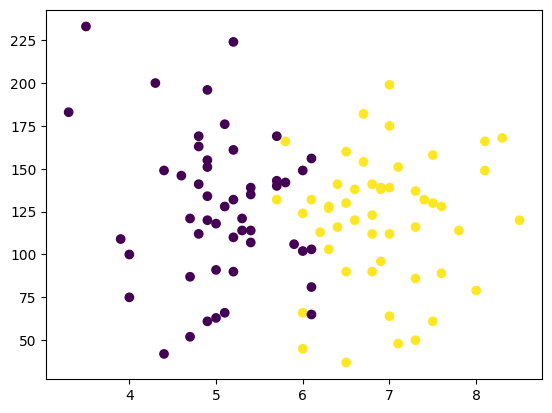

In [29]:
plt.scatter(df['cgpa'],df['iq'], c =df['placement'])

In [30]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [31]:
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [32]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [33]:
y.shape

(100,)

In [35]:
from os import X_OK
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [36]:
x_train

,cgpa,iq
45,6.0,66.0
69,8.5,120.0
54,6.4,141.0
21,7.1,151.0
4,5.8,142.0
...,...,...
79,6.5,90.0
51,4.8,141.0
58,8.0,79.0
87,5.7,132.0


In [37]:
y_train

45    1
69    1
54    1
21    1
4     0
     ..
79    1
51    0
58    1
87    1
68    0
Name: placement, Length: 90, dtype: int64

In [38]:
x_test

,cgpa,iq
49,5.4,135.0
25,5.0,91.0
14,6.1,103.0
59,4.8,112.0
9,5.1,66.0
11,6.9,138.0
5,7.1,48.0
75,4.8,169.0
67,5.0,118.0
22,4.9,120.0


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
x_train = scaler.fit_transform(x_train)

In [41]:
x_train

array([[-0.03848645, -1.47384195],
       [ 2.12637661, -0.1269311 ],
       [ 0.30789164,  0.39686756],
       [ 0.9140533 ,  0.64629549],
       [-0.2116755 ,  0.42181035],
       [ 0.74086425, -0.72555815],
       [-0.73124264, -0.37635904],
       [-0.9910262 ,  1.76872119],
       [-1.42399882,  0.5964099 ],
       [-1.77037691, -0.62578697],
       [-0.81783716,  0.07261124],
       [ 0.04810807,  0.17238242],
       [ 1.26043139, -1.59855592],
       [ 0.04810807, -1.09970005],
       [-1.07762073,  0.94560901],
       [ 1.08724234, -0.22670228],
       [ 1.95318757,  1.07032298],
       [-0.64464811, -0.10198831],
       [-1.16421525, -0.95004329],
       [ 0.5676752 ,  0.72112387],
       [-1.25080977,  0.52158152],
       [ 0.65426973, -0.32647345],
       [-0.12508098, -0.47613021],
       [ 0.39448616,  0.87078063],
       [ 1.26043139,  0.82089505],
       [-0.29827002,  0.37192476],
       [ 0.65426973,  0.39686756],
       [ 0.5676752 ,  1.41952209],
       [ 0.65426973,

In [42]:
x_test = scaler.transform(x_test)

In [47]:
from sklearn.linear_model import LogisticRegression


In [48]:
clf = LogisticRegression()

In [51]:
#model Training
clf.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_prd = clf.predict(x_test)

In [53]:
y_test

49    0
25    0
14    0
59    0
9     0
11    1
5     1
75    0
67    0
22    0
Name: placement, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_prd)

0.9

In [57]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

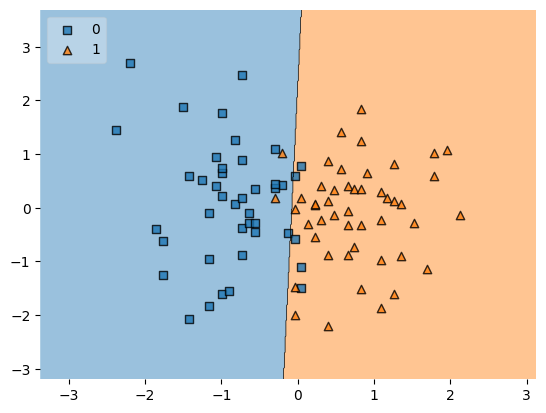

In [58]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [59]:
import pickle

In [60]:
pickle.dump(clf,open('model.pkl','wb'))